#Library and Drive Imports

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#path to file
path = "/content/drive/MyDrive/Computer Vision Tasks/KALMAN FILTER ALGORITHM/kalmann.txt"

In [10]:
file=open(path,'r')
pos=np.loadtxt(path,delimiter=',',usecols=[0,1])
vel=np.loadtxt(path,skiprows=1,delimiter=',',usecols=[2,3])
vel=np.insert(vel,[0],0,axis=0)

#Value Initialization

In [11]:
value_array=[0.075,0.03,0.02,0.1,0.1,5,5,1000]
del_t=value_array[0]
sigma_ax=value_array[1]
sigma_ay=value_array[2]
sigma_x=value_array[3]
sigma_y=value_array[4]
sigma_vx=value_array[5]
sigma_vy=value_array[6]
pos_x0,pos_y0=pos[0]
p=value_array[-1]

In [12]:
pred_state=[]
est_state=[]
pred_p=[]
est_p=[]

In [13]:
F=np.zeros((6,6))
F[0,:3]=(1,del_t,0.5*del_t**2)
F[1,:3]=(0,1,del_t)
F[2,2]=1
F[3,3:6]=(1,del_t,0.5*del_t**2)
F[4,3:6]=(0,1,del_t)
F[5,5]=1
FT=np.transpose(F)


In [ ]:
# Q=np.zeros((6,6))
# Q[0,:3]=(0.05*del_t**5*sigma_ax**2,0.125*del_t**4*sigma_ax**2,(1/6)*del_t**3*sigma_ax**2)
# Q[1,:3]=(0,(1/3)*del_t**3*sigma_ax**2,0.5*del_t**2*sigma_ax**2)
# Q[2,:3]=(0,0,1*sigma_ax**2*del_t)
# Q[3,3:6]=(0.05*del_t**5*sigma_ay**2,0.125*del_t**4*sigma_ay**2,(1/6)*del_t**3*sigma_ay**2)
# Q[4,3:6]=(0,(1/3)*del_t**3*sigma_ay**2,0.5*del_t**2*sigma_ay**2)
# Q[5,3:6]=(0,0,1*sigma_ay**2*del_t)
# # Q=Q*sigma_ay**2
# # Q-Continuos noise

In [14]:
Q=np.zeros((6,6))
Q[0,:3]=(0.25*del_t**4*sigma_ax**2,0.5*del_t**3*sigma_ax**2,0.5*del_t**2*sigma_ax**2)
Q[1,:3]=(0,del_t**2*sigma_ax**2,del_t*sigma_ax**2)
Q[2,:3]=(0,0,1*sigma_ax**2)
Q[3,3:6]=(0.25*del_t**4*sigma_ay**2,0.5*del_t**3*sigma_ay**2,0.5*del_t**2*sigma_ay**2)
Q[4,3:6]=(0,del_t**2*sigma_ay**2,del_t*sigma_ay**2)
Q[5,3:6]=(0,0,1*sigma_ay**2)
# Q=Q*sigma_ay**2
# Q-Discrete noise

In [15]:
R=np.zeros((4,4))
R[0,0],R[1,1],R[2,2],R[3,3]=(sigma_x**2,sigma_vx**2,sigma_y**2,sigma_vy**2)
# R

In [16]:
H=np.zeros((4,6))
H[0,0],H[1,1],H[2,3],H[3,4] =(1,1,1,1)
HT=np.transpose(H)
# H

In [17]:
temp=np.zeros((6,1))
temp[:,0]=[pos_x0,0,0,pos_y0,0,0]
est_state.append(temp)
# est_state[0]

In [18]:
temp=np.diag((p,p,p,p,p,p))
est_p.append(temp)
# est_p[0]

#Function Definition

In [19]:
def state_extrapolate(xn):
    xnext=np.dot(F,xn)
    return xnext
def cov_extrapolate(pn):
    pnext=np.dot(np.dot(F,pn),FT) +Q
    return pnext
def measure(n):
    z=np.zeros((4,1))
    z[:,0]=(pos[n,0],vel[n,0],pos[n,1],vel[n,1])
    return z   
def K_gain(n):
    kn=np.dot(np.dot(pred_p[n-1],HT),(np.linalg.inv(np.dot(np.dot(H,pred_p[n-1]),HT)+R)))
    return kn             
def state_update(xn_1,kn,zn):
    xn=xn_1 + np.dot(kn,(zn-np.dot(H,xn_1)))
    return xn
def cov_update(pn_1,kn):
    idm=(np.identity(6)-np.dot(kn,H))
    idmT=np.transpose(idm)
    pn=np.dot(np.dot(idm,pn_1),idmT)+ np.dot(np.dot(kn,R),np.transpose(kn))
    return pn

#Iteration Run

In [20]:
pred_state.append(state_extrapolate(est_state[0]))
pred_p.append(cov_extrapolate(est_p[0]))
for i in range(1,len(vel)):
    print("\n---------------------------------\n\nIteration :-",i)
    zi=measure(i)
    ki=K_gain(i)
    est_state.append(state_update(pred_state[i-1],ki,zi))
    print("Estimated position(x,y) :- (%g,%g)" % (est_state[i][0],est_state[i][3]))
    est_p.append(cov_update(pred_p[i-1],ki))
    pred_state.append(state_extrapolate(est_state[i]))
    print("Uncertainity(x,y) :- (%g,%g)" % (est_p[i][0,0],est_p[i][3,3]))
    pred_p.append(cov_extrapolate(est_p[i]))
    


---------------------------------

Iteration :- 1
Estimated position(x,y) :- (368.189,6.59655)
Uncertainity(x,y) :- (0.0099999,0.0099999)

---------------------------------

Iteration :- 2
Estimated position(x,y) :- (369.359,12.0599)
Uncertainity(x,y) :- (0.00888206,0.00888206)

---------------------------------

Iteration :- 3
Estimated position(x,y) :- (375.865,19.0801)
Uncertainity(x,y) :- (0.00829578,0.00829578)

---------------------------------

Iteration :- 4
Estimated position(x,y) :- (368.223,25.3153)
Uncertainity(x,y) :- (0.00824954,0.00824954)

---------------------------------

Iteration :- 5
Estimated position(x,y) :- (368.665,31.6854)
Uncertainity(x,y) :- (0.00806763,0.00806763)

---------------------------------

Iteration :- 6
Estimated position(x,y) :- (369.417,38.6242)
Uncertainity(x,y) :- (0.00770016,0.00770016)

---------------------------------

Iteration :- 7
Estimated position(x,y) :- (368.111,44.9714)
Uncertainity(x,y) :- (0.00726643,0.00726642)

--------------

#Visualization

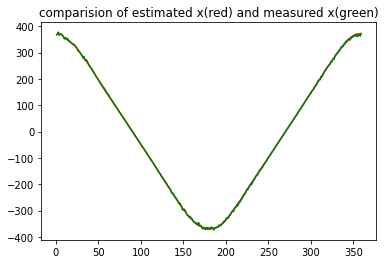

In [21]:
i=np.arange(1,len(vel))
ar=[]
br=[]
m=[]
for p in range(1,len(vel)):
    ar.append(pred_state[p][0])
    br.append(est_state[p][0])
    m.append(pos[p][0])
# pred_state[2][0]
# plt.plot(i,ar,color='orange')
plt.plot(i,br,color='red')
plt.plot(i,m,color='green')
plt.title("comparision of estimated x(red) and measured x(green)")
plt.show()

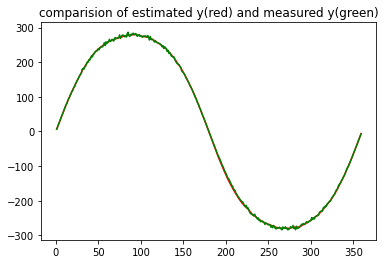

In [22]:
i=np.arange(1,len(vel))
ar=[]
br=[]
m=[]
for p in range(1,len(vel)):
    ar.append(pred_state[p][3])
    br.append(est_state[p][3])
    m.append(pos[p][1])
# pred_state[2][0]
# plt.plot(i,ar,color='orange')
plt.plot(i,br,color='red')
plt.plot(i,m,color='green')
plt.title("comparision of estimated y(red) and measured y(green)")
plt.show()

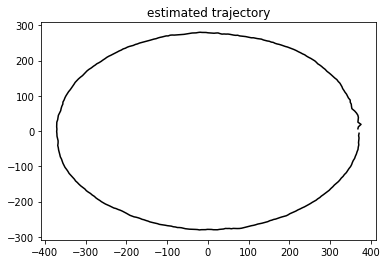

In [23]:
i=np.arange(1,len(vel))
ar=[]
br=[]
m=[]
for p in range(1,len(vel)):
    ar.append(est_state[p][0])
    br.append(est_state[p][3])
    m.append(pos[p][0])
# pred_state[2][0]
plt.plot(ar,br,color='black')
plt.title("estimated trajectory")
plt.show()

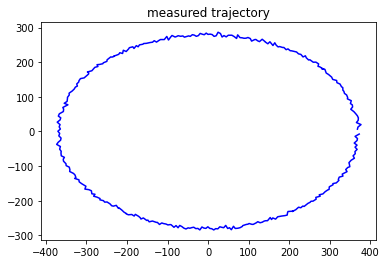

In [24]:
i=np.arange(1,len(vel))
ar=[]
br=[]
m=[]
for p in range(1,len(vel)):
    ar.append(pos[p][0])
    br.append(pos[p][1])
#     m.append(pos[p][0])
# pred_state[2][0]
plt.plot(ar,br,color='blue')
plt.title("measured trajectory")
plt.show()

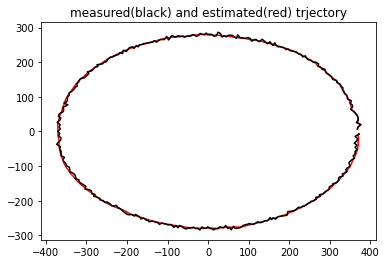

In [25]:
i=np.arange(1,len(vel))
ar=[]
br=[]
ar1=[]
br1=[]
ar2=[]
br2=[]
m=[]
for p in range(1,len(vel)):
    ar.append(est_state[p][0])
    br.append(est_state[p][3])    
    ar1.append(pred_state[p][0])
    br1.append(pred_state[p][3])
    ar2.append(pos[p][0])
    br2.append(pos[p][1])    
#     m.append(pos[p][0])
# pred_state[2][0]
plt.plot(ar,br,color='red')
# plt.plot(ar1,br1,color='orange')
plt.plot(ar2,br2,color='black')
plt.title("measured(black) and estimated(red) trjectory")
# plt.plot(i,br)
# plt.plot(i,m)
# measured(red) and estimated(blue) trjectory
plt.show()